In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import  confusion_matrix,classification_report,ConfusionMatrixDisplay,f1_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

In [19]:
data = load_breast_cancer()

df = pd.DataFrame(data.data,columns=data.feature_names)

df['target'] = data.target
print(df.head())

X = data.data
y = data.target




   mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [22]:
y_pred = model.predict(X_test)


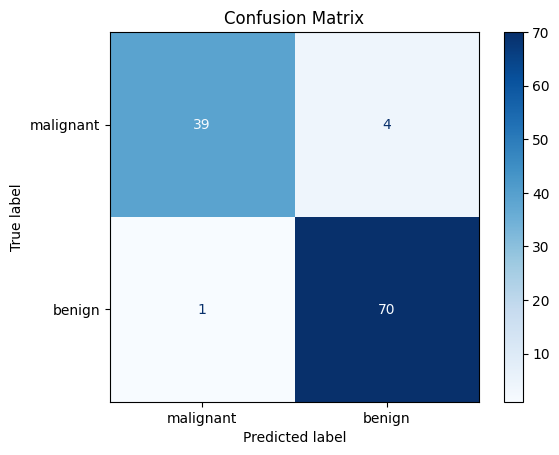

Classification Report:

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


In [24]:
# F1-Score using 5-Fold Cross-Validation
f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print("F1 Scores for each fold:", f1_scores)
print("Average F1 Score:", f1_scores.mean())


F1 Scores for each fold: [0.95302013 0.95833333 0.98611111 0.94444444 0.96402878]
Average F1 Score: 0.9611875600190988
